In [1]:
import numpy as np
from sentinelsat import SentinelAPI

api = SentinelAPI('michogar', 'tvsptqzKuUULb87L')

## POLYGON used to query the API
<geographic type> = POLYGON((P1Lon P1Lat, P2Lon P2Lat, ..., PnLon PnLat))
where P1Lon and P1Lat are the Longitude and Latitude coordinates of the first point of the polygon in decimal degrees (DDD) format (e.g. 2.17403, 41.40338) and so on.

In [2]:
from sentinelsat import read_geojson, geojson_to_wkt

footprint = geojson_to_wkt(read_geojson('larioja/bloque1_extension.geojson'))

products = api.query(footprint,
                     date=('20220323', '20220523'),
                     platformname='Sentinel-2',
                     cloudcoverpercentage=0)

products_df = api.to_geodataframe(products)
products_df.to_file("products.gpkg", layer='footprints', driver="GPKG")
print(products_df)
image_start = products_df.iloc[-1]

products = api.query(footprint,
                     date=('20220731', '20220831'),
                     platformname='Sentinel-2',
                     cloudcoverpercentage=0)
image_end = products_df.iloc[-1]
print(products_df)

                                                                                  title   
ed726079-4f9a-4f97-940a-f2eb1b3d1d7f  S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_2...  \

                                                                                   link   
ed726079-4f9a-4f97-940a-f2eb1b3d1d7f  https://apihub.copernicus.eu/apihub/odata/v1/P...  \

                                                                       link_alternative   
ed726079-4f9a-4f97-940a-f2eb1b3d1d7f  https://apihub.copernicus.eu/apihub/odata/v1/P...  \

                                                                              link_icon   
ed726079-4f9a-4f97-940a-f2eb1b3d1d7f  https://apihub.copernicus.eu/apihub/odata/v1/P...  \

                                                                                summary   
ed726079-4f9a-4f97-940a-f2eb1b3d1d7f  Date: 2022-04-06T11:06:21.024Z, Instrument: MS...  \

                                     ondemand    datatakesensingstart   
ed726079-4f9

In [4]:
uuid = image_start['uuid']
print(uuid)
api.download(uuid)

MD5 checksumming:   0%|          | 0.00/151M [00:00<?, ?B/s]

{'id': 'ed726079-4f9a-4f97-940a-f2eb1b3d1d7f',
 'title': 'S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_20220406T152741',
 'size': 150692957,
 'md5': '5002fd3d72a57d91c4620fd72aebaefa',
 'date': datetime.datetime(2022, 4, 6, 11, 6, 21, 24000),
 'footprint': 'POLYGON((-2.6233215 42.45049660369834,-2.6275635 42.43924156075016,-2.6834412 42.29365390456558,-2.739746 42.14817535071566,-2.7939758 42.00210031955532,-2.848236 41.85599444483344,-2.9025269 41.709823560209294,-2.956604 41.563588317616365,-2.9938354 41.46371529016238,-3.0002441 41.463751887157464,-3.0002441 42.45269119915018,-2.6233215 42.45049660369834))',
 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('ed726079-4f9a-4f97-940a-f2eb1b3d1d7f')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 4, 6, 18, 13, 2, 52000),
 'Ingestion Date': datetime.datetime(2022, 4, 6, 18, 12, 20, 741000),
 'manifest_name': 'manifest.safe',
 'product_root_dir': 'S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_20220406T1527

ed726079-4f9a-4f97-940a-f2eb1b3d1d7f


{'id': 'ed726079-4f9a-4f97-940a-f2eb1b3d1d7f',
 'title': 'S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_20220406T152741',
 'size': 150692957,
 'md5': '5002fd3d72a57d91c4620fd72aebaefa',
 'date': datetime.datetime(2022, 4, 6, 11, 6, 21, 24000),
 'footprint': 'POLYGON((-2.6233215 42.45049660369834,-2.6275635 42.43924156075016,-2.6834412 42.29365390456558,-2.739746 42.14817535071566,-2.7939758 42.00210031955532,-2.848236 41.85599444483344,-2.9025269 41.709823560209294,-2.956604 41.563588317616365,-2.9938354 41.46371529016238,-3.0002441 41.463751887157464,-3.0002441 42.45269119915018,-2.6233215 42.45049660369834))',
 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('ed726079-4f9a-4f97-940a-f2eb1b3d1d7f')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 4, 6, 18, 13, 2, 52000),
 'Ingestion Date': datetime.datetime(2022, 4, 6, 18, 12, 20, 741000),
 'manifest_name': 'manifest.safe',
 'product_root_dir': 'S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_20220406T1527

Se descarga un ZIP con los archivos de la imagen. En /S2B_MSIL1C_20230304T105849_N0509_R094_T30TVK_20230304T130129.SAFE/GRANULE/L1C_T30TVK_A031294_20230304T110115/IMG_DATA/ encontramos las imágenes de las diferentes bandas.

In [7]:
import zipfile

zip_ref = zipfile.ZipFile('S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_20220406T152741.zip', 'r')

# extract only the band 04
zip_ref.extract('S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_20220406T152741.SAFE/GRANULE/L1C_T30TWM_A035455_20220406T111327/IMG_DATA/T30TWM_20220406T110621_B04.jp2', path='.')

'S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_20220406T152741.SAFE/GRANULE/L1C_T30TWM_A035455_20220406T111327/IMG_DATA/T30TWM_20220406T110621_B04.jp2'

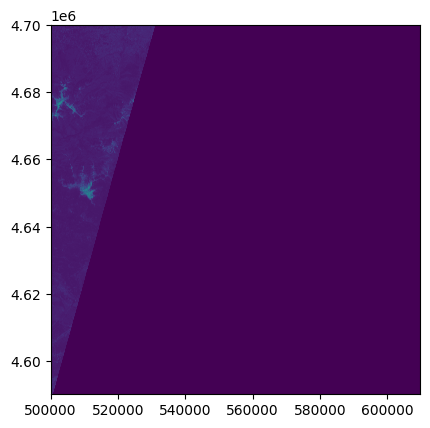

In [8]:
# convert to tiff
import rasterio
from rasterio.plot import show

image_path = 'S2A_MSIL1C_20220406T110621_N0400_R137_T30TWM_20220406T152741.SAFE/GRANULE/L1C_T30TWM_A035455_20220406T111327/IMG_DATA/T30TWM_20220406T110621_B04.jp2'

with rasterio.open(image_path) as src:
    show(src)



In [ ]:
import fiona
import pyproj
from shapely.geometry import shape
from shapely.ops import transform

wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:32630')

project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform

with fiona.open("cutter.geojson", "r") as bbox_geojson:
    shapes = [transform(project, shape(feature["geometry"])) for feature in bbox_geojson]

print(shapes[0].wkt)

In [ ]:
import rasterio


NODATA = 0

with rasterio.open(image_path) as src:
    mask_image, mask_transform = rasterio.mask.mask(src,
                                                      shapes,
                                                      crop=True,
                                                      all_touched=True,
                                                      nodata=NODATA)
    out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                     "height": mask_image.shape[1],
                     "width": mask_image.shape[2],
                     "transform": mask_transform,
                     "nodata": NODATA
                     })

with rasterio.open(f"{image_path}.cut.tif", "w", **out_meta) as dest:
        dest.write(mask_image)

In [ ]:
# open the cut image
# house value = 2882
import numpy as np
with rasterio.open(f"{image_path}.cut.tif") as src:

    with fiona.open("house.geojson", "r") as house_geojson:
        house = [transform(project, shape(feature["geometry"])) for feature in house_geojson]

        # calculate the row and col of the house
        pixel_size = src.res[0]
        col = int((house[0].x - src.bounds.left) / pixel_size)
        row = int((src.bounds.top - house[0].y) / pixel_size)

        b4 = src.read(1)
        max = np.amax(b4)
        min = np.amin(b4[np.nonzero(b4)])
        mean = np.mean(b4[np.nonzero(b4)])
        value = b4[row, col]

    print(f"max: {max}, min: {min}, mean: {mean}, value: {value}")
